# **IMPLEMENTATION DU FRAMEWORK DE MON ARTICLE DE BASE AVEC OPTIMISATION DE PARAMETRES PAR DETECTION D"ANOMALIES ET SELECTION AUTOMATIQUE DE VARIABLES**

## **Thème :** Apprentissage par ensemble pour la prédiction de la résistance à la compression des bétons de hautes performances (BHPs) 

### **Auteur** : ANANJOU TSAFACK Ornéla Stéla

### **Encadreurs**: Dr. TIOGNING Lauraine et Dr. MELATAGIA Paulin

## **I) Thématique**


*   **Thème** : Prédiction de la résistance mécanique des bétons de hautes performances (BHPs).

*   **Question Scientifique** : Quel modèle d'apprentissage par ensemble permet de prédire au mieux la résistance à la compression des BHPs?

*   **Objectif Scientifique** : Construire un modèle d'apprentissage par ensemble qui prédise efficacement la résistance à la compression des BHPs



##  **II) Données utilisées**

### **1) Informations sur les Données** :
Le jeu de donné provient de https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength sous
le nom de **Concrete Compressive Strength DataSet** .
Il compte **1030 observations** , **9 variables**( *ciment, scories de haut fourneaux, cendres volantes, l’eau, le super-plastifiant, les agrégats de coarse, les particules fines, l’âge* ) et une variable cible correspondant à la ***résistance mécanique***.


### **2) Présentation des données**

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest

In [2]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Cement (component 1)(kg in a m^3 mixture),540.000000,540.000000,332.500000,332.50000,198.600000,266.000000,380.000000,380.00000,266.000000,475.00000,198.600000,198.600000,427.50000,190.000000,304.000000,380.00000,139.600000,342.000000,380.000000,475.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.000000,0.000000,142.500000,142.50000,132.400000,114.000000,95.000000,95.00000,114.000000,0.00000,132.400000,132.400000,47.50000,190.000000,76.000000,0.00000,209.400000,38.000000,95.000000,0.000000
Fly Ash (component 3)(kg in a m^3 mixture),0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Water (component 4)(kg in a m^3 mixture),162.000000,162.000000,228.000000,228.00000,192.000000,228.000000,228.000000,228.00000,228.000000,228.00000,192.000000,192.000000,228.00000,228.000000,228.000000,228.00000,192.000000,228.000000,228.000000,228.000000
Superplasticizer (component 5)(kg in a m^3 mixture),2.500000,2.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1040.000000,1055.000000,932.000000,932.00000,978.400000,932.000000,932.000000,932.00000,932.000000,932.00000,978.400000,978.400000,932.00000,932.000000,932.000000,932.00000,1047.000000,932.000000,932.000000,932.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),676.000000,676.000000,594.000000,594.00000,825.500000,670.000000,594.000000,594.00000,670.000000,594.00000,825.500000,825.500000,594.00000,670.000000,670.000000,670.00000,806.900000,670.000000,594.000000,594.000000
Age (day),28.000000,28.000000,270.000000,365.00000,360.000000,90.000000,365.000000,28.00000,28.000000,28.00000,90.000000,28.000000,270.00000,90.000000,28.000000,90.00000,90.000000,365.000000,90.000000,180.000000
"Concrete compressive strength(MPa, megapascals)",79.986111,61.887366,40.269535,41.05278,44.296075,47.029847,43.698299,36.44777,45.854291,39.28979,38.074244,28.021684,43.01296,42.326932,47.813782,52.90832,39.358048,56.141962,40.563252,42.620648


In [3]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [16]:
# Ici on fractionne notre dataset et 90 et 10 comme l'article de base (leur dataset etait de 1228 exemples)

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.1,random_state=42)

#### 1)La normalisation du dataset

In [17]:
# Normalisation z-score ou standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test= scaler.transform(X_test)

X_train.shape

(927, 8)

In [18]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

regressors ={
    "XGBRegressor":XGBRegressor(random_state = 42),
    "CatBoostRegressor": CatBoostRegressor(random_state=42),
    "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'mse','mae','r2'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test,y_pred),".3"),
           'r2' : format(r2_score(y_test,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()


Learning rate set to 0.040456
0:	learn: 16.3460361	total: 1.72ms	remaining: 1.72s
1:	learn: 15.9415812	total: 2.93ms	remaining: 1.46s
2:	learn: 15.5920827	total: 4.19ms	remaining: 1.39s
3:	learn: 15.1995911	total: 5.46ms	remaining: 1.36s
4:	learn: 14.8329248	total: 7.35ms	remaining: 1.46s
5:	learn: 14.5014998	total: 8.98ms	remaining: 1.49s
6:	learn: 14.1583006	total: 10.6ms	remaining: 1.5s
7:	learn: 13.8197139	total: 12ms	remaining: 1.49s
8:	learn: 13.5101303	total: 13.3ms	remaining: 1.46s
9:	learn: 13.2193832	total: 14.5ms	remaining: 1.44s
10:	learn: 12.9601939	total: 15.8ms	remaining: 1.42s
11:	learn: 12.6644335	total: 17ms	remaining: 1.4s
12:	learn: 12.3975268	total: 18.3ms	remaining: 1.39s
13:	learn: 12.1379344	total: 19.6ms	remaining: 1.38s
14:	learn: 11.9007340	total: 20.9ms	remaining: 1.37s
15:	learn: 11.6602196	total: 22.1ms	remaining: 1.36s
16:	learn: 11.4448036	total: 24.2ms	remaining: 1.4s
17:	learn: 11.2224203	total: 25.9ms	remaining: 1.41s
18:	learn: 11.0175170	total: 27.2

,model,run_time,rmse,mse,mae,r2
0,XGBRegressor,0.01,4.59,21.1,3.07,0.921
1,CatBoostRegressor,0.03,3.71,13.8,2.54,0.948
2,LGBMRegressor,0.0,4.06,16.5,2.96,0.938


##### Tune the Isolation Forest model

In [19]:
model = IsolationForest(random_state=42)

param_grid = {
              'contamination': ['auto', 0.1,0.15,0.2,0.25,0.30,0.35,0.4,0.45,0.5, 0.05], 
            #   'max_features': [10, 15], 
            #   'bootstrap': [True], 
            #   'n_jobs': [-1],
            # 'max_samples': [10]
              }

grid_search = GridSearchCV(model,param_grid,scoring="neg_mean_squared_error", 
                        refit=True,return_train_score=True)
grid_search.fit(X_train, y_train)

best_model = grid_search.fit(X_train, y_train)

print('Optimum parameters', best_model.best_params_)


Optimum parameters {'contamination': 0.05}


In [20]:
print('Optimum parameters', best_model.best_score_)

Optimum parameters -1514.8379169915347


##### Run the tuned Isolation Forest model

In [21]:
# Now we will fit an IsolationForest model to the training data (not the 
# test data) using the optimum settings we identified using the grid search above.

# Running the Isolation Forest model will return a Numpy array of predictions
# containing the outliers we need to remove. 

iforest=IsolationForest(random_state=42, contamination=0.05)

# Perform fit on X and returns labels for X. Returns -1 for outliers and 1 for inliers.
iforest_y_pred = iforest.fit_predict(X_train)

iforest_y_pred


array([ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

Remove the outliers

In [22]:
X_train_iforest, y_train_iforest = X_train[(iforest_y_pred != -1), :], y_train[(iforest_y_pred != -1)]

In [23]:
print(X_train_iforest.shape, y_train_iforest.shape)


(880, 8) (880,)



Refit the regression model

In [24]:
regressors ={
    "XGBRegressor":XGBRegressor(random_state = 42),
    "CatBoostRegressor": CatBoostRegressor(random_state=42),
    "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'mse'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train_iforest, y_train_iforest)
    y_pred = model.predict(X_test)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key.upper(),
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test,y_pred),".3"),
           'r2' : format(r2_score(y_test,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()


Learning rate set to 0.040124
0:	learn: 16.2364139	total: 2.59ms	remaining: 2.59s
1:	learn: 15.8411535	total: 4.22ms	remaining: 2.11s
2:	learn: 15.4663766	total: 5.37ms	remaining: 1.78s
3:	learn: 15.1252151	total: 6.57ms	remaining: 1.64s
4:	learn: 14.7830090	total: 7.78ms	remaining: 1.55s
5:	learn: 14.4754787	total: 9.04ms	remaining: 1.5s
6:	learn: 14.1312748	total: 10.2ms	remaining: 1.45s
7:	learn: 13.7949536	total: 11.4ms	remaining: 1.41s
8:	learn: 13.4806200	total: 12.5ms	remaining: 1.38s
9:	learn: 13.1755329	total: 13.7ms	remaining: 1.36s
10:	learn: 12.9171337	total: 14.9ms	remaining: 1.34s
11:	learn: 12.6064011	total: 16.3ms	remaining: 1.34s
12:	learn: 12.3363243	total: 18.2ms	remaining: 1.38s
13:	learn: 12.0708477	total: 20.4ms	remaining: 1.44s
14:	learn: 11.8396644	total: 22ms	remaining: 1.44s
15:	learn: 11.5937056	total: 23.7ms	remaining: 1.46s
16:	learn: 11.3546599	total: 25.4ms	remaining: 1.47s
17:	learn: 11.1432076	total: 26.7ms	remaining: 1.46s
18:	learn: 10.9362530	total: 

,model,run_time,rmse,mse,mae,r2
0,XGBREGRESSOR,0.01,4.64,21.5,2.9,0.919
1,CATBOOSTREGRESSOR,0.03,3.6,13.0,2.54,0.951
2,LGBMREGRESSOR,0.0,4.11,16.9,3.07,0.937


In [5]:
# Convertir le tableau obtenu en un dataframe
normData=pd.DataFrame(normData)
normData

,0,1,2,3,4,5,6,7,8
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733,-0.182649


In [6]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(normData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = normData.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


In [7]:
normData.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,0.000000,2.759389e-17,3.587206e-16,-2.759389e-17,2.276496e-16,-1.931572e-16,2.069542e-17,2.759389e-16
std,1.000486e+00,1.000486,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-0.856886,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,-2.005443e+00
25%,-8.500258e-01,-0.856886,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,-7.252985e-01
50%,-7.912996e-02,-0.601776,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,-8.235105e-02
75%,6.589771e-01,0.800751,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,6.179613e-01
max,2.477918e+00,3.310688,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,2.801689e+00


#### 2) Separation du jeu de donnees entre les variables caracteristiques et la variable cible

In [9]:

rng = np.random.RandomState(0)


In [48]:
# Fonction d'assistance pour entraîner et prédire le modèle IF pour une fonctionnalité
def train_and_predict_if(df, feature): 
    clf = IsolationForest(random_state=42,contamination=0.1) 
    clf.fit(df[[feature]]) 
    pred = clf.predict(df [[feature]]) 
    scores = clf.decision_function(df[[feature]]) 
    stats = pd.DataFrame() 
    stats['val'] = df[feature] 
    stats['score'] = scores 
    stats['outlier' ] = pred 
    stats['min'] = df[feature].min() 
    stats['max'] = df[feature].max() 
    stats['mean'] = df[feature].mean() 
    stats['feature'] = [feature] * len(df) 
    # stats['outliers_number'] = len((stats.outlier==-1).value_counts())
    return stats

In [49]:
# Fonction d'assistance pour imprimer les valeurs aberrantes
def print_outliers(df,feature, n):
    print(feature) 
    print(df[feature].head(n).to_string(), "\n") 

#Parcourez toutes les fonctionnalités et enregistrez les scores aberrants pour chaque fonctionnalité
    num_columns = [i for i in list(df.columns) if i not in list(df.select_dtypes('object').columns) and i not in ['Id']]
    result = pd.DataFrame()
    for feature in num_columns:
        stats = train_and_predict_if(df, feature)
        result = pd.concat([result, stats])
        
# Rassemblez les principales valeurs aberrantes pour chaque fonctionnalité
    outliers = {team: grp.drop('feature', axis=1)
    for team, grp in result.sort_values(by='score').groupby('feature')}
    return outliers

In [50]:
stats_Cement = pd.DataFrame() 
stats_Blast = pd.DataFrame() 
stats_Fly = pd.DataFrame() 
stats_Water = pd.DataFrame() 
stats_Super = pd.DataFrame() 
stats_Coarse = pd.DataFrame() 
stats_Fine = pd.DataFrame() 
stats_Age = pd.DataFrame() 

In [51]:
stats_Cement=train_and_predict_if(X, "Cement")
stats_Cement

,val,score,outlier,min,max,mean,feature
0,2.477918,-0.124175,-1,-1.715219,2.477918,9.657862e-17,Cement
1,2.477918,-0.124175,-1,-1.715219,2.477918,9.657862e-17,Cement
2,0.491443,0.087536,1,-1.715219,2.477918,9.657862e-17,Cement
3,0.491443,0.087536,1,-1.715219,2.477918,9.657862e-17,Cement
4,-0.790432,0.060275,1,-1.715219,2.477918,9.657862e-17,Cement
...,...,...,...,...,...,...,...
1025,-0.045623,0.083940,1,-1.715219,2.477918,9.657862e-17,Cement
1026,0.392837,0.089618,1,-1.715219,2.477918,9.657862e-17,Cement
1027,-1.270057,0.073353,1,-1.715219,2.477918,9.657862e-17,Cement
1028,-1.168580,0.066619,1,-1.715219,2.477918,9.657862e-17,Cement


In [52]:

(stats_Cement.outlier==-1).value_counts()
# statistics.head(10)

False    927
True     103
Name: outlier, dtype: int64

In [53]:
print(stats_Cement.outlier==-1)

0        True
1        True
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: outlier, Length: 1030, dtype: bool


In [54]:
stats_Blast=train_and_predict_if(X, "BlastFurnaceSlag")

In [55]:
(stats_Blast.outlier==-1).value_counts()

False    927
True     103
Name: outlier, dtype: int64

In [56]:
#FlyAsh	Water	Superplasticizer	CoarseAggregate	FineAggregare	Age
stats_Fly=train_and_predict_if(X,"FlyAsh")

In [57]:
(stats_Fly.outlier==-1).value_counts()

False    927
True     103
Name: outlier, dtype: int64

In [58]:
stats_Water=train_and_predict_if(X,"Water")

In [59]:
(stats_Water.outlier==-1).value_counts()

False    940
True      90
Name: outlier, dtype: int64

In [60]:
stats_Super=train_and_predict_if(X,"Superplasticizer")

In [61]:
(stats_Super.outlier==-1).value_counts()

False    928
True     102
Name: outlier, dtype: int64

In [62]:
stats_Coarse=train_and_predict_if(X,"CoarseAggregate")

In [63]:
(stats_Coarse.outlier==-1).value_counts()

False    934
True      96
Name: outlier, dtype: int64

In [64]:
stats_Fine=train_and_predict_if(X,"FineAggregate")

In [65]:
(stats_Fine.outlier==-1).value_counts()

False    928
True     102
Name: outlier, dtype: int64

In [66]:
stats_Age=train_and_predict_if(X,"Age")

In [67]:
(stats_Age.outlier==-1).value_counts()


False    944
True      86
Name: outlier, dtype: int64

In [68]:
# Y=IsolationForest.decision_function(X)
# Y

#### 2) Fractionnment des donnees en jeu d'entrainement et de test

In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Information mutuelle

In [70]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.2768788 , 0.18283808, 0.12922033, 0.34827063, 0.22532349,
       0.23387108, 0.18240096, 0.33992561])

In [71]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Water               0.348271
Age                 0.339926
Cement              0.276879
CoarseAggregate     0.233871
Superplasticizer    0.225323
BlastFurnaceSlag    0.182838
FineAggregate       0.182401
FlyAsh              0.129220
dtype: float64

<AxesSubplot: >

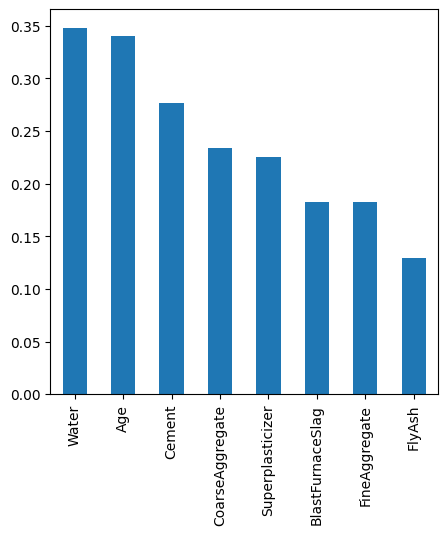

In [72]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5,5))

In [73]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=5)
selected_top_columns

SelectPercentile(percentile=5,
                 score_func=<function mutual_info_regression at 0x7febe4043370>)

In [74]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Cement', 'Water', 'Superplasticizer', 'CoarseAggregate', 'Age'], dtype='object')

#### 3) Entrainement des différents modèles

##### **e) Extreme Gradient Boosting(XGBoost)**

In [79]:

import xgboost as xgb
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred_xgbr=xgbr.predict(X_test)
xgbr_r2=xgbr.score(X_test,y_test)
xgbr_r1=xgbr.score(X_train,y_train)

# print("Model \t\t\t\t\t\t Phase \t\t\t R2")

# print(" Extreme Gradient Boosting Regressor \t\t Train \t\t\t{:.3f}".format(xgbr_r1))

# print(" Extreme Gradient Boosting Regressor \t\t Test\t\t\t{:.3f}".format(xgbr_r2))

y_train_pred_xgbr = xgbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Extreme Gradient Boosting Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_xgbr,squared=False),mean_squared_error(y_train, y_train_pred_xgbr),
            mean_absolute_error(y_train, y_train_pred_xgbr), r2_score(y_train, y_train_pred_xgbr)))
print("""Extreme Gradient Boosting Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_xgbr, squared=False),mean_squared_error(y_test, y_pred_xgbr),
            mean_absolute_error(y_test, y_pred_xgbr), r2_score(y_test, y_pred_xgbr)))

Model					 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Extreme Gradient Boosting Regressor 	 Train 		 0.064 		 0.004 		0.026 		0.996
Extreme Gradient Boosting Regressor 	 Test 		 0.255 		 0.065 		0.165 		0.932


##### **f) Light Gradient Boosting Machine(LightGBM)**

In [80]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr=lgbmr.predict(X_test)
# lgbmr_r2=lgbmr.score(X_test,y_test)
# lgbmr_r1 = lgbmr.score(X_train, y_train)

# print("Model \t\t\t\t\t\t Phase \t\t\t R2")

# print(" Light Gradient Boosting Machine \t\t Train \t\t\t{:.3f}".format(lgbmr_r1))

# print(" Light Gradient Boosting Machine \t\t Test\t\t\t{:.3f}".format(lgbmr_r2))

y_train_pred_lgbmr = lgbmr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Light Gradient Boosting Machine \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_lgbmr,squared=False),mean_squared_error(y_train, y_train_pred_lgbmr),
            mean_absolute_error(y_train, y_train_pred_lgbmr), r2_score(y_train, y_train_pred_lgbmr)))
print("""Light Gradient Boosting Machine \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_lgbmr, squared=False),mean_squared_error(y_test, y_pred_lgbmr),
            mean_absolute_error(y_test, y_pred_lgbmr), r2_score(y_test, y_pred_lgbmr)))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 927, number of used features: 8
[LightGBM] [Info] Start training from score 0.009573
Model					 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Light Gradient Boosting Machine 	 Train 		 0.130 		 0.017 		0.084 		0.983
Light Gradient Boosting Machine 	 Test 		 0.243 		 0.059 		0.177 		0.938


##### **g) Categorical Boosting(CatBoost)**

In [81]:
import catboost as catb
from catboost import CatBoostRegressor
catbr = CatBoostRegressor()
catbr.fit(X_train, y_train)
y_pred_catbr=catbr.predict(X_test)
catbr_r1=catbr.score(X_train,y_train)
catbr_r2=catbr.score(X_test,y_test)

# print("\nModel \t\t\t\t\t\t Phase \t\t\t R2")
# print(" Categorical Boosting \t\t Train \t\t\t{:.3f}".format(catbr_r1))
# print(" Categorical Boosting \t\t Test\t\t\t{:.3f}".format(catbr_r2))

y_train_pred_catbr = catbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Categorical Boosting \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_catbr,squared=False),mean_squared_error(y_train, y_train_pred_catbr),
            mean_absolute_error(y_train, y_train_pred_catbr), r2_score(y_train, y_train_pred_catbr)))
print("""Categorical Boosting \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_catbr, squared=False),mean_squared_error(y_test, y_pred_catbr),
            mean_absolute_error(y_test, y_pred_catbr), r2_score(y_test, y_pred_catbr)))

Learning rate set to 0.040456
0:	learn: 0.9780267	total: 1.46ms	remaining: 1.46s
1:	learn: 0.9526081	total: 2.78ms	remaining: 1.39s
2:	learn: 0.9328785	total: 3.91ms	remaining: 1.3s
3:	learn: 0.9093300	total: 5.18ms	remaining: 1.29s
4:	learn: 0.8875484	total: 7.68ms	remaining: 1.53s
5:	learn: 0.8654736	total: 9.45ms	remaining: 1.57s
6:	learn: 0.8439899	total: 10.9ms	remaining: 1.54s
7:	learn: 0.8256199	total: 12.2ms	remaining: 1.51s
8:	learn: 0.8084291	total: 13.5ms	remaining: 1.48s
9:	learn: 0.7897514	total: 15.3ms	remaining: 1.52s
10:	learn: 0.7713156	total: 16.8ms	remaining: 1.51s
11:	learn: 0.7553193	total: 18.1ms	remaining: 1.49s
12:	learn: 0.7393054	total: 19.5ms	remaining: 1.48s
13:	learn: 0.7245613	total: 21ms	remaining: 1.48s
14:	learn: 0.7093264	total: 23.8ms	remaining: 1.56s
15:	learn: 0.6965446	total: 25.3ms	remaining: 1.55s
16:	learn: 0.6834992	total: 27ms	remaining: 1.56s
17:	learn: 0.6700626	total: 28.4ms	remaining: 1.55s
18:	learn: 0.6572719	total: 29.9ms	remaining: 1.5